# **Enhancing Email Engagement: Data Analysis, Predictive Modeling, and Actionable Insights**

# Data Analysis

In [ ]:
import pickle
import csv

# Loading data from the .pkl file
file_path = 'email_campaigns.pkl'
with open(file_path, 'rb') as file:
    loaded_data = pickle.load(file)


headers = [
    'Email Type', 'Subject', 'Body', 'Opened', 'Meeting Link Clicked', 'Responded'
]


csv_filename = 'emails_data.csv'

with open(csv_filename, 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=headers)

    # Write headers to the CSV file
    writer.writeheader()

    # Write each email's data into the CSV file
    for email_group in loaded_data:
        email_type = list(email_group.keys())[0]
        emails = email_group[email_type]

        for email in emails:
            if isinstance(email, dict):
                writer.writerow({
                    'Email Type': email_type,
                    'Subject': email.get('subject', ''),
                    'Body': email.get('body', ''),
                    'Opened': email.get('opened', False),
                    'Meeting Link Clicked': email.get('meeting link clicked', False),
                    'Responded': email.get('responded', False)
                })

print(f"CSV file '{csv_filename}' has been generated successfully.")


CSV file 'emails_data.csv' has been generated successfully.


In [ ]:
import csv
csv_filename = 'emails_data.csv'
import pandas as pd
data = pd.read_csv(csv_filename)
print(data.head())

  Email Type                                            Subject  \
0   example1  🚀 Propel Your Marketing ROI with Advanced Anal...   
1   example1  Data is Your Superpower 📊 Unlock Insights with Us   
2   example1  Turn Marketing Data Into Decisions 🧐 Let's Exp...   
3   example1  Marketing Success is a Click Away - Let's Chat...   
4   example1  🚀 Boost Your Brand's Visibility with Proven Ma...   

                                                Body Opened  \
0  Hey [Recipient's Name],\n\nReady to see your m...  False   
1  Hi [Recipient's Name],\n\nI'm reaching out aga...   True   
2  Greetings [Recipient's Name],\n\nWe haven't co...  False   
3  Hello [Recipient's Name],\n\nIt's clear that y...   True   
4  Hi [Recipient's Name],\n\nIn the digital age, ...  False   

  Meeting Link Clicked Responded  
0                False     False  
1                False     False  
2                False     False  
3                 True     False  
4                False     False  


In [ ]:
# Checking for missing values
print("\nNumber of missing values in each column:")
print(data.isnull().sum())




Number of missing values in each column:
Email Type              0
Subject                 0
Body                    0
Opened                  0
Meeting Link Clicked    0
Responded               0
dtype: int64


In [ ]:
# Getting information about columns and data types
print("\nInformation about the DataFrame:")
print(data.info())




Information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Email Type            152 non-null    object
 1   Subject               152 non-null    object
 2   Body                  152 non-null    object
 3   Opened                152 non-null    object
 4   Meeting Link Clicked  152 non-null    object
 5   Responded             152 non-null    object
dtypes: object(6)
memory usage: 7.2+ KB
None


In [ ]:
# Checking data type and display unique values for 'Opened','Meeting Link Clicked','Responded' column
print(data['Opened'].dtype)
print(list(data['Opened'].unique()))
print(data['Meeting Link Clicked'].dtype)
print(list(data['Meeting Link Clicked'].unique()))
print(data['Responded'].dtype)
print(list(data['Responded'].unique()))


object
['False', 'True', '0', '1']
object
['False', 'True', '0', '1']
object
['False', 'True', '0']


In [ ]:
# Converting string representations to boolean
data['Opened'] = data['Opened'].replace({'True': True, 'False': False, '1': True, '0': False})
print(data['Opened'].unique())
data['Meeting Link Clicked'] = data['Meeting Link Clicked'].replace({'True': True, 'False': False, '1': True, '0': False})
print(data['Meeting Link Clicked'].unique())
data['Responded'] = data['Responded'].replace({'True': True, 'False': False, '1': True, '0': False})
print(data['Responded'].unique())


[False  True]
[False  True]
[False  True]


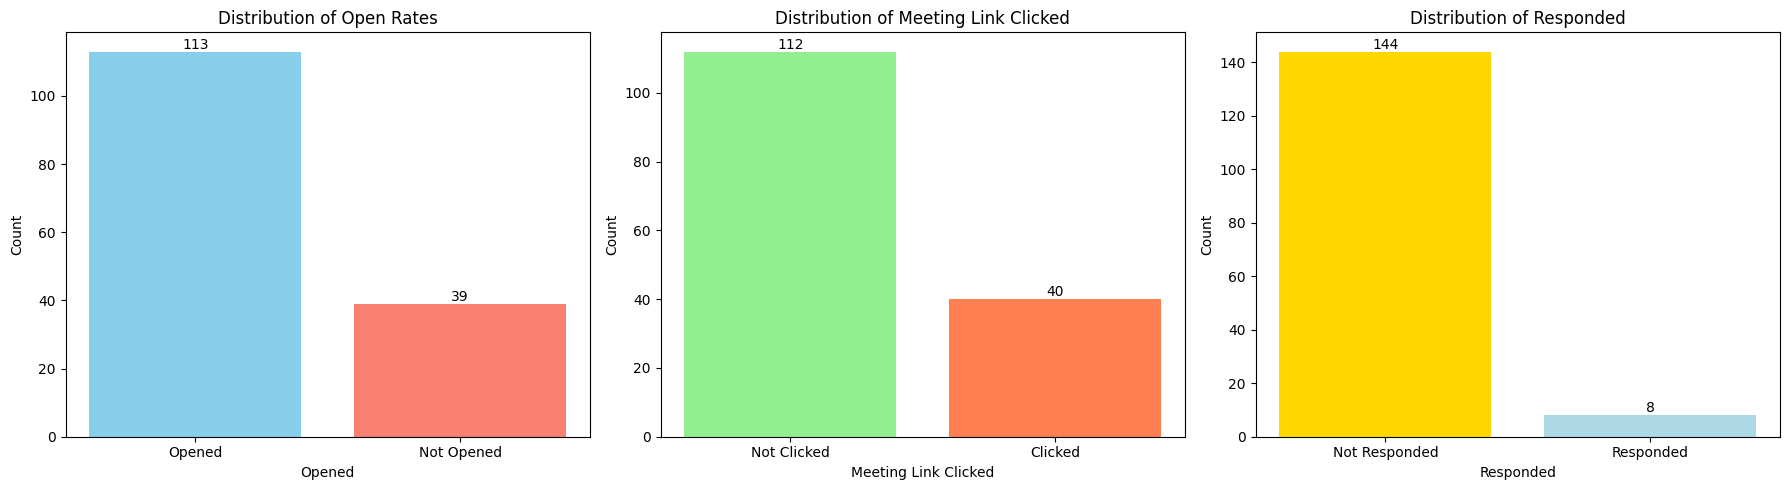

In [ ]:
import matplotlib.pyplot as plt
# Calculating counts of 'True' and 'False' in the 'Opened','Meeting Link Clicked','Responded' column
opened_counts = data['Opened'].value_counts()
mlc_counts = data['Meeting Link Clicked'].value_counts()
responded_counts = data['Responded'].value_counts()

# Creating a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plot for 'Opened' column
axs[0].bar(opened_counts.index.map({True: 'Opened', False: 'Not Opened'}), opened_counts, color=['skyblue', 'salmon'])
axs[0].set_title('Distribution of Open Rates')
axs[0].set_xlabel('Opened')
axs[0].set_ylabel('Count')
for i, count in enumerate(opened_counts):
    axs[0].text(i, count, str(count), ha='center', va='bottom')

# Plot for 'Meeting Link Clicked' column
axs[1].bar(mlc_counts.index.map({True: 'Clicked', False: 'Not Clicked'}), mlc_counts, color=['lightgreen', 'coral'])
axs[1].set_title('Distribution of Meeting Link Clicked')
axs[1].set_xlabel('Meeting Link Clicked')
axs[1].set_ylabel('Count')
for i, count in enumerate(mlc_counts):
    axs[1].text(i, count, str(count), ha='center', va='bottom')

# Plot for 'Responded' column
axs[2].bar(responded_counts.index.map({True: 'Responded', False: 'Not Responded'}), responded_counts, color=['gold', 'lightblue'])
axs[2].set_title('Distribution of Responded')
axs[2].set_xlabel('Responded')
axs[2].set_ylabel('Count')
for i, count in enumerate(responded_counts):
    axs[2].text(i, count, str(count), ha='center', va='bottom')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the combined figure
plt.show()


In [ ]:
import spacy
import string

# Loading English tokenizer, tagger, parser, NER, and word vectors
nlp = spacy.load("en_core_web_sm")

# Define a function for text preprocessing using spaCy
def text_preprocessing(text):
    # Load the text using spaCy
    doc = nlp(text)

    # Lemmatize each token and remove stop words and punctuation
    processed_tokens = [token.lemma_ for token in doc if not token.is_stop and token.text not in string.punctuation]

    # Join tokens back to a single string
    processed_text = ' '.join(processed_tokens)

    return processed_text

# Apply text preprocessing to 'Body' and 'Subject' columns
if 'Body' in data.columns and 'Subject' in data.columns:
    print("Applying text preprocessing to 'Body' column...")
    data['Processed_Body'] = data['Body'].apply(text_preprocessing)
    print("Text preprocessing for 'Body' column completed.\n")

    print("Applying text preprocessing to 'Subject' column...")
    data['Processed_Subject'] = data['Subject'].apply(text_preprocessing)
    print("Text preprocessing for 'Subject' column completed.\n")
else:
    print("Body or Subject columns not found in the dataset.")


Applying text preprocessing to 'Body' column...
Text preprocessing for 'Body' column completed.

Applying text preprocessing to 'Subject' column...
Text preprocessing for 'Subject' column completed.



In [ ]:
from textblob import TextBlob

# Define a function for sentiment analysis using TextBlob
def get_sentiment_scores_textblob(text):
    blob = TextBlob(str(text))
    polarity = blob.sentiment.polarity
    return polarity

# Apply sentiment analysis to 'Processed_Body' and 'Processed_Subject' columns
data['Sentiment_Body'] = data['Processed_Body'].apply(get_sentiment_scores_textblob)
data['Sentiment_Subject'] = data['Processed_Subject'].apply(get_sentiment_scores_textblob)


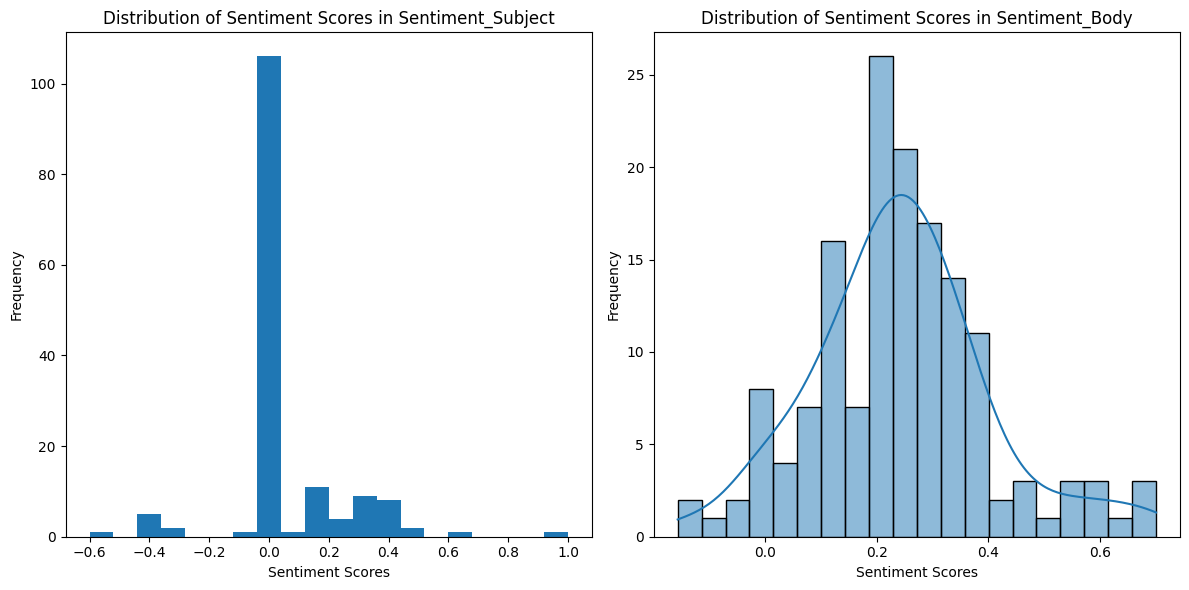

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram for Sentiment_Subject
axs[0].hist(data['Sentiment_Subject'], bins=20)
axs[0].set_xlabel('Sentiment Scores')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Distribution of Sentiment Scores in Sentiment_Subject')

# Plot histogram for Sentiment_Body using seaborn
sns.histplot(data['Sentiment_Body'], bins=20, kde=True, ax=axs[1])
axs[1].set_title('Distribution of Sentiment Scores in Sentiment_Body')
axs[1].set_xlabel('Sentiment Scores')
axs[1].set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
sentiment_data = {
    'Sentiment_Body': data['Sentiment_Body'],
    'Sentiment_Subject': data['Sentiment_Subject']
}

# Create a DataFrame with Sentiment_Body and Sentiment_Subject columns
sentiment_df = pd.DataFrame(sentiment_data)

# Print the DataFrame as a table
print(sentiment_df)


     Sentiment_Body  Sentiment_Subject
0          0.126667                0.4
1          0.300000                0.0
2          0.233333                0.0
3          0.333333                0.3
4          0.218087                0.0
..              ...                ...
147        0.217273                0.0
148        0.611111                0.0
149        0.200000                0.0
150        0.300000                0.0
151        0.311111                0.0

[152 rows x 2 columns]


In [ ]:
import pandas as pd


# Describe Sentiment_Body column
sentiment_body_description = data['Sentiment_Body'].describe()

# Describe Sentiment_Subject column
sentiment_subject_description = data['Sentiment_Subject'].describe()

# Combine descriptions into a DataFrame
description_df = pd.DataFrame({
    'Sentiment_Body': sentiment_body_description,
    'Sentiment_Subject': sentiment_subject_description
})

# Print the description DataFrame
print(description_df)


       Sentiment_Body  Sentiment_Subject
count      152.000000         152.000000
mean         0.243191           0.055233
std          0.159431           0.192595
min         -0.156250          -0.600000
25%          0.140625           0.000000
50%          0.240222           0.000000
75%          0.327083           0.000000
max          0.700000           1.000000


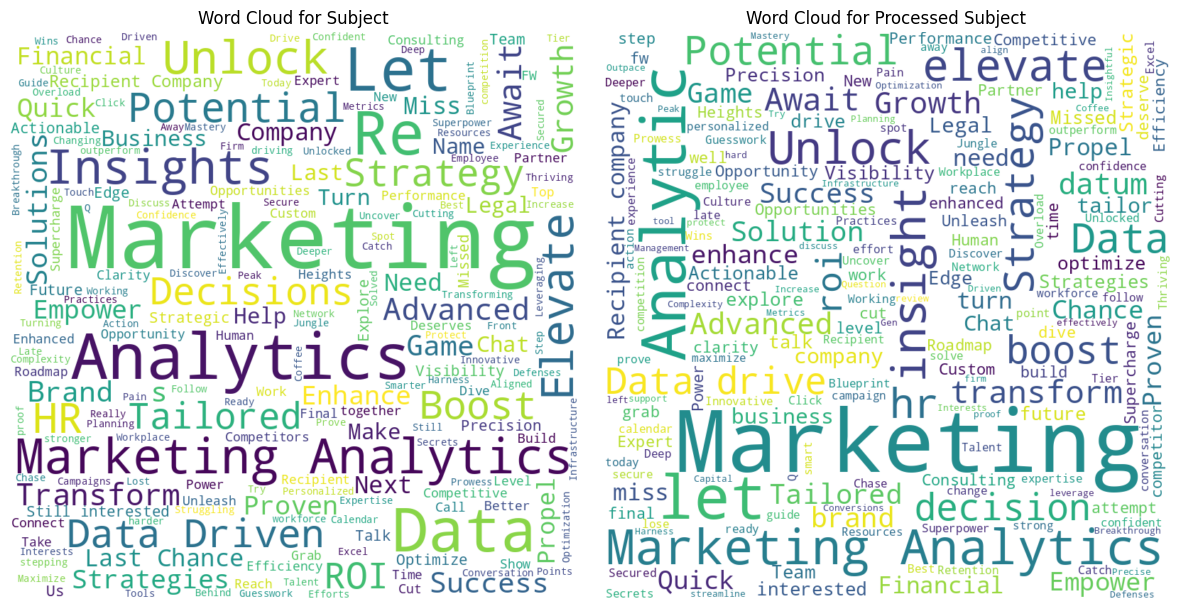

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate Word Cloud for 'Subject' column
wordcloud_subject = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = None,
                min_font_size = 10).generate(' '.join(data['Subject']))

# Generate Word Cloud for 'Processed_Subject' column
wordcloud_processed_subject = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = None,
                min_font_size = 10).generate(' '.join(data['Processed_Subject']))

# Plot Word Clouds
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_subject, interpolation='bilinear')
plt.title('Word Cloud for Subject')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_processed_subject, interpolation='bilinear')
plt.title('Word Cloud for Processed Subject')
plt.axis('off')

plt.tight_layout()
plt.show()


<ipython-input-9-0b15fba4c6d1>:17: UserWarning: Glyph 128640 (\N{ROCKET}) missing from current font.
  plt.tight_layout()
<ipython-input-9-0b15fba4c6d1>:17: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
<ipython-input-9-0b15fba4c6d1>:17: UserWarning: Glyph 128073 (\N{WHITE RIGHT POINTING BACKHAND INDEX}) missing from current font.
  plt.tight_layout()
<ipython-input-9-0b15fba4c6d1>:17: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128640 (\N{ROCKET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12

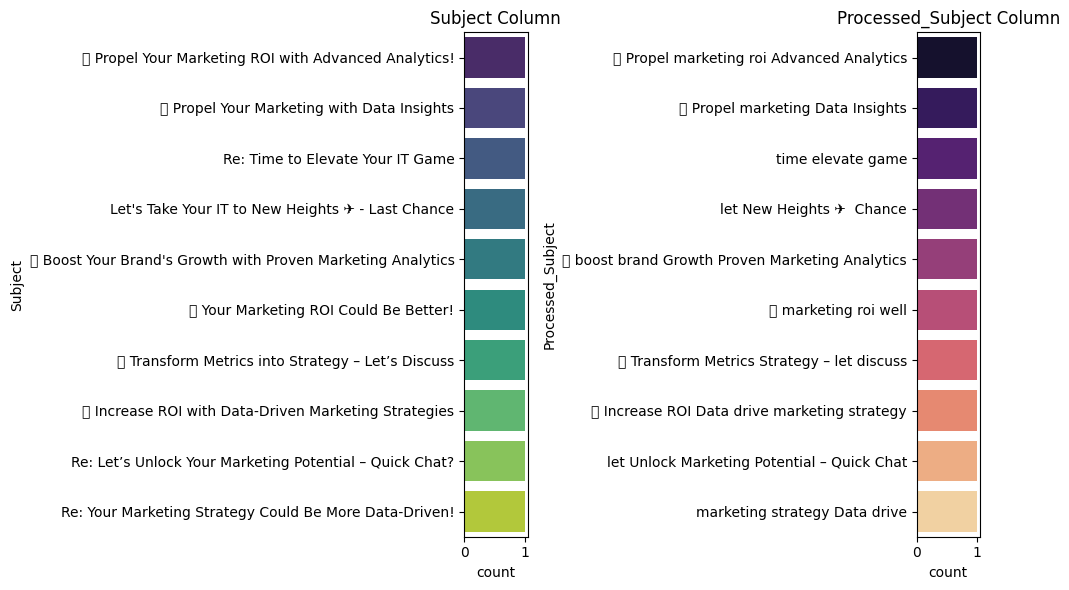

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot count of values in 'Subject' column
plt.subplot(1, 2, 1)
sns.countplot(y=data["Subject"], order=data["Subject"].value_counts().index[:10], palette='viridis')
plt.title('Subject Column')

# Plot count of values in 'Processed_Subject' column
plt.subplot(1, 2, 2)
sns.countplot(y=data["Processed_Subject"], order=data["Processed_Subject"].value_counts().index[:10], palette='magma')
plt.title('Processed_Subject Column')

plt.tight_layout()
plt.show()


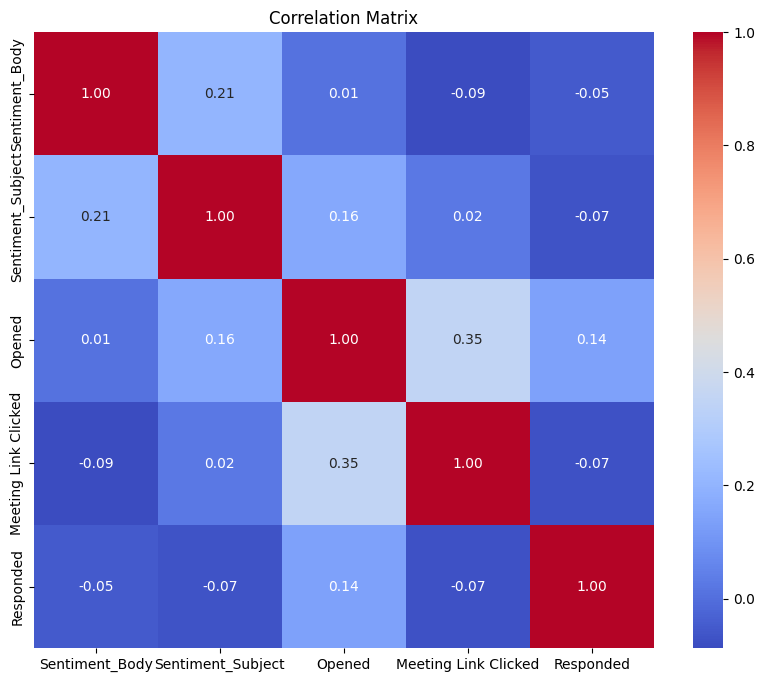

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Concatenate 'Sentiment_Body' with other relevant columns
sentiment_and_other_features = data[['Sentiment_Body', 'Sentiment_Subject','Opened', 'Meeting Link Clicked', 'Responded']]


# Calculate correlation matrix
correlation_matrix = sentiment_and_other_features.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


# **Model Development**

## Model 1: Predicting Email Open Rates (**Polynomial Regression**)  

 **Using feelings in messages, a model guessed email opening 0.214 off and 0.463 a bit off, but didn't predict well with a score of -0.040**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as  np

# Define features and target variable
X = data[['Sentiment_Body', 'Sentiment_Subject']]
y = data['Opened']  # Target variable 'Opened'

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize PolynomialFeatures
poly = PolynomialFeatures(degree=2)

# Apply polynomial features to the entire dataset
X_poly = poly.fit_transform(X)

# Fit polynomial regression model using the entire dataset
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

# Apply polynomial features to both training and test data
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit polynomial regression model using the training data
poly_reg.fit(X_train_poly, y_train)

# Use the trained model to predict the target variable for the test data
predictions = poly_reg.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r_squared}")


Mean Squared Error: 0.21433858303569153
Root Mean Squared Error: 0.4629671511410842
R-squared: -0.040299890390401716


# **Model 2: Predicting Meeting Link Clicks** (**Polynomial Regression**)


Using sentiment analysis, the model predicting meeting link clicks achieved a Mean Squared Error of 0.185 and a Root Mean Squared Error of 0.430, with an R-squared value of 0.034. While an improvement, the model's accuracy may benefit from further enhancement for better predictions

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as  np

# Define features and target variable
X = data[['Sentiment_Body', 'Sentiment_Subject']]
y = data['Meeting Link Clicked']  # Target variable 'Opened'

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize PolynomialFeatures
poly = PolynomialFeatures(degree=2)

# Apply polynomial features to the entire dataset
X_poly = poly.fit_transform(X)

# Fit polynomial regression model using the entire dataset
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

# Apply polynomial features to both training and test data
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit polynomial regression model using the training data
poly_reg.fit(X_train_poly, y_train)

# Use the trained model to predict the target variable for the test data
predictions = poly_reg.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r_squared}")


Mean Squared Error: 0.18501137751735022
Root Mean Squared Error: 0.43012948924405336
R-squared: 0.033717751118622186


## **Model 3: Predicting Email Response Rates** (**Polynomial Regression**)


Attempting to predict email response rates resulted in an MSE of 0.035 and RMSE of 0.186. The R-squared value at -0.109 indicates challenges in achieving accurate predictions, requiring potential enhancements for better performance

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as  np

# Define features and target variable
X = data[['Sentiment_Body', 'Sentiment_Subject']]
y = data['Responded']  # Target variable 'Opened'

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize PolynomialFeatures
poly = PolynomialFeatures(degree=2)

# Apply polynomial features to the entire dataset
X_poly = poly.fit_transform(X)

# Fit polynomial regression model using the entire dataset
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

# Apply polynomial features to both training and test data
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit polynomial regression model using the training data
poly_reg.fit(X_train_poly, y_train)

# Use the trained model to predict the target variable for the test data
predictions = poly_reg.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r_squared}")


Mean Squared Error: 0.03462871212587753
Root Mean Squared Error: 0.18608791504522137
R-squared: -0.10927307843227618


**Feature Engineering with 'Email Length' and 'Word Count' Columns**

In [ ]:
data['Email_Length'] = data['Body'].apply(len)
data['Word_Count'] = data['Body'].apply(lambda x: len(x.split()))

In [ ]:
print(data.columns)

Index(['Email Type', 'Subject', 'Body', 'Opened', 'Meeting Link Clicked',
       'Responded', 'Processed_Body', 'Processed_Subject', 'Sentiment_Body',
       'Sentiment_Subject', 'Email_Length', 'Word_Count'],
      dtype='object')


# After Adding new Feature [ Email_Length ] & [ Word_Count ]
## Model 1: Predicting Email Open Rates (**Polynomial Regression**)


The predictive model achieved a Mean Squared Error (MSE) of 0.180 and Root Mean Squared Error (RMSE) of 0.425. The R-squared value of 0.125 indicates moderate success in explaining variance, suggesting room for improvement to enhance predictive accuracy.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
# Features
X = data[['Sentiment_Body', 'Sentiment_Subject', 'Email_Length', 'Word_Count']]

# Target variable
y = data['Opened']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize PolynomialFeatures
poly = PolynomialFeatures(degree=2)

# Apply polynomial features to both training and test data
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit polynomial regression model
poly_reg.fit(X_train_poly, y_train)

# Use the trained model to predict the target variable for the test data
predictions = poly_reg.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r_squared}")


Mean Squared Error: 0.18038154103664036
Root Mean Squared Error: 0.42471348111007773
R-squared: 0.12451181345347784


# **Model 2: Predicting Meeting Link Clicks** (**Polynomial Regression**)
##With new Feature [ Email_Length ] & [ Word_Count ]

The model's guesses were around 0.219 off and 0.468 a bit off. But with a score of -0.146, it didn't guess very well, needing big improvements

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
# Features
X = data[['Sentiment_Body', 'Sentiment_Subject', 'Email_Length', 'Word_Count']]

# Target variable
y = data['Meeting Link Clicked']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize PolynomialFeatures
poly = PolynomialFeatures(degree=2)

# Apply polynomial features to both training and test data
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit polynomial regression model
poly_reg.fit(X_train_poly, y_train)

# Use the trained model to predict the target variable for the test data
predictions = poly_reg.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r_squared}")


Mean Squared Error: 0.21939339539996996
Root Mean Squared Error: 0.46839448694446645
R-squared: -0.14585354880092982


## **Model 3: Predicting Email Response Rates** (**Polynomial Regression**)

##With new Feature [ Email_Length ] & [ Word_Count ]

The model yielded a Mean Squared Error (MSE) of 0.072 and Root Mean Squared Error (RMSE) of 0.268. However, with an R-squared value of -1.296, the model's ability to explain variance appears significantly poor, indicating substantial limitations in predictive accuracy



In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
# Features
X = data[['Sentiment_Body', 'Sentiment_Subject', 'Email_Length', 'Word_Count']]

# Target variable
y = data['Responded']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize PolynomialFeatures
poly = PolynomialFeatures(degree=2)

# Apply polynomial features to both training and test data
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit polynomial regression model
poly_reg.fit(X_train_poly, y_train)

# Use the trained model to predict the target variable for the test data
predictions = poly_reg.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r_squared}")


Mean Squared Error: 0.07168346455882871
Root Mean Squared Error: 0.2677376786312093
R-squared: -1.2962603147011449


### **Model 1: Predicting Email Open Rates (Random Forest Regressor & Gradient Boosting Regressor)**


Both models, Random Forest Regressor and Gradient Boosting Regressor, showed poor fit with negative R-squared values (-0.2295 and -0.2077 respectively). They had MSE and RMSE indicating average differences in predicted and actual values, highlighting the need for improved modeling accuracy.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = data[['Sentiment_Body', 'Sentiment_Subject', 'Email_Length', 'Word_Count']]
y = data['Opened']

# Split the data into training and test sets (adjust the test_size and random_state as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
rf_predictions = rf_reg.predict(X_test)

# Evaluate Random Forest Regressor
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_r_squared = r2_score(y_test, rf_predictions)

print("Random Forest Regressor:")
print(f"Mean Squared Error: {rf_mse}")
print(f"Root Mean Squared Error: {rf_rmse}")
print(f"R-squared: {rf_r_squared}")

# Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_reg.fit(X_train, y_train)
gb_predictions = gb_reg.predict(X_test)

# Evaluate Gradient Boosting Regressor
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_rmse = np.sqrt(gb_mse)
gb_r_squared = r2_score(y_test, gb_predictions)

print("\nGradient Boosting Regressor:")
print(f"Mean Squared Error: {gb_mse}")
print(f"Root Mean Squared Error: {gb_rmse}")
print(f"R-squared: {gb_r_squared}")


Random Forest Regressor:
Mean Squared Error: 0.2533258064516129
Root Mean Squared Error: 0.5033148184303865
R-squared: -0.22952575757575744

Gradient Boosting Regressor:
Mean Squared Error: 0.24883132361765165
Root Mean Squared Error: 0.49882995461144036
R-squared: -0.20771162624526873


# **Model 2: Predicting Meeting Link Clicks(Random Forest Regressor & Gradient Boosting Regressor)**

Random Forest Regressor:

MSE: 0.2058, RMSE: 0.4537, R-squared: -0.0749
Gradient Boosting Regressor:

MSE: 0.2219, RMSE: 0.4711, R-squared: -0.1591
Both models show poor fit with negative R-squared values (-0.0749, -0.1591), indicating inadequate performance in explaining data variance.







In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = data[['Sentiment_Body', 'Sentiment_Subject', 'Email_Length', 'Word_Count']]
y = data['Meeting Link Clicked']

# Split the data into training and test sets (adjust the test_size and random_state as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
rf_predictions = rf_reg.predict(X_test)

# Evaluate Random Forest Regressor
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_r_squared = r2_score(y_test, rf_predictions)

print("Random Forest Regressor:")
print(f"Mean Squared Error: {rf_mse}")
print(f"Root Mean Squared Error: {rf_rmse}")
print(f"R-squared: {rf_r_squared}")

# Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_reg.fit(X_train, y_train)
gb_predictions = gb_reg.predict(X_test)

# Evaluate Gradient Boosting Regressor
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_rmse = np.sqrt(gb_mse)
gb_r_squared = r2_score(y_test, gb_predictions)

print("\nGradient Boosting Regressor:")
print(f"Mean Squared Error: {gb_mse}")
print(f"Root Mean Squared Error: {gb_rmse}")
print(f"R-squared: {gb_r_squared}")


Random Forest Regressor:
Mean Squared Error: 0.2058129032258064
Root Mean Squared Error: 0.45366607017255145
R-squared: -0.07492499999999946

Gradient Boosting Regressor:
Mean Squared Error: 0.22192105621139394
Root Mean Squared Error: 0.4710849776965871
R-squared: -0.1590550816258125


## **Model 3: Predicting Email Response Rates** (**Random Forest Regressor & Gradient Boosting Regressor**)




Random Forest Regressor:
MSE: 0.0398, RMSE: 0.1996, R-squared: -0.2760
Gradient Boosting Regressor:
MSE: 0.0598, RMSE: 0.2445, R-squared: -0.9150
Both models exhibit poor fit with significant negative R-squared values (-0.2760, -0.9150), indicating inadequate performance in explaining the data variance.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = data[['Sentiment_Body', 'Sentiment_Subject', 'Email_Length', 'Word_Count']]
y = data['Responded']

# Split the data into training and test sets (adjust the test_size and random_state as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
rf_predictions = rf_reg.predict(X_test)

# Evaluate Random Forest Regressor
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_r_squared = r2_score(y_test, rf_predictions)

print("Random Forest Regressor:")
print(f"Mean Squared Error: {rf_mse}")
print(f"Root Mean Squared Error: {rf_rmse}")
print(f"R-squared: {rf_r_squared}")

# Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_reg.fit(X_train, y_train)
gb_predictions = gb_reg.predict(X_test)

# Evaluate Gradient Boosting Regressor
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_rmse = np.sqrt(gb_mse)
gb_r_squared = r2_score(y_test, gb_predictions)

print("\nGradient Boosting Regressor:")
print(f"Mean Squared Error: {gb_mse}")
print(f"Root Mean Squared Error: {gb_rmse}")
print(f"R-squared: {gb_r_squared}")


Random Forest Regressor:
Mean Squared Error: 0.03983225806451612
Root Mean Squared Error: 0.19958020459082637
R-squared: -0.2759599999999989

Gradient Boosting Regressor:
Mean Squared Error: 0.05978272823894787
Root Mean Squared Error: 0.24450506792078538
R-squared: -0.9150400612542957


## Feature Engineering: Text Data Analysis and Metrics

In [ ]:
# Subject Word Count
data['Subject_Word_Count'] = data['Subject'].apply(lambda x: len(x.split()))

# Subject Average Word Length
data['Subject_Avg_Word_Length'] = data['Subject'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()))

# Body Word Count
data['Body_Word_Count'] = data['Body'].apply(lambda x: len(x.split()))

# Body Average Word Length
data['Body_Avg_Word_Length'] = data['Body'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()))


In [ ]:
print(data.columns)

Index(['Email Type', 'Subject', 'Body', 'Opened', 'Meeting Link Clicked',
       'Responded', 'Processed_Body', 'Processed_Subject', 'Sentiment_Body',
       'Sentiment_Subject', 'Email_Length', 'Word_Count', 'Subject_Word_Count',
       'Subject_Avg_Word_Length', 'Body_Word_Count', 'Body_Avg_Word_Length'],
      dtype='object')


## **Random Forest Regression Analysis for Predicting Meeting Link Clicks**


The Random Forest Regression model yielded an MSE of 0.189, RMSE of 0.435, and an R-squared value of 0.011, suggesting limited predictive capability in explaining variance for predicting meeting link clicks.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Define features and target
features = [
    'Sentiment_Body', 'Sentiment_Subject', 'Email_Length', 'Word_Count',
    'Subject_Word_Count', 'Subject_Avg_Word_Length', 'Body_Word_Count',
    # Add more relevant features here
]
target = 'Meeting Link Clicked'

X = data[features]
y = data[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model (Random Forest Regressor as an example)
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Make predictions
predictions = rf_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, predictions)

print("Random Forest Regressor:")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r_squared}")


Random Forest Regressor:
Mean Squared Error: 0.18927741935483872
Root Mean Squared Error: 0.4350602479597955
R-squared: 0.011436956521739372


In [ ]:
# Function to check if specific keywords are present in the text
def keyword_present(text, keywords):
    for keyword in keywords:
        if keyword.lower() in text.lower():
            return True
    return False

# Keywords to check for
subject_keywords = ['important', 'urgent', 'attention']
promo_words = ['discount', 'offer', 'promo']
sale_words = ['sale', 'clearance', 'limited time']

# Create 'Subject_Keywords_Present' column
data['Subject_Keywords_Present'] = data['Subject'].apply(lambda x: keyword_present(x, subject_keywords))

# Create 'Body_Keywords_Present' column
data['Body_Keywords_Present'] = data['Body'].apply(lambda x: keyword_present(x, subject_keywords))

# Create 'Contains_Promo_Word' column
data['Contains_Promo_Word'] = data['Body'].apply(lambda x: keyword_present(x, promo_words))

# Create 'Contains_Sale_Word' column
data['Contains_Sale_Word'] = data['Body'].apply(lambda x: keyword_present(x, sale_words))


# Predicting Email Engagement with Random Forest Regression: Feature Selection, Training, and Evaluation

The Random Forest Regression model achieved an MSE of 0.152 and RMSE of 0.390. With an R-squared value of 0.205, the model displayed moderate predictive ability in explaining variance for predicting meeting link clicks.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
features = [
    'Sentiment_Body', 'Sentiment_Subject', 'Email_Length', 'Word_Count',
    'Subject_Word_Count', 'Subject_Avg_Word_Length', 'Body_Word_Count',
    'Body_Avg_Word_Length', 'Subject_Keywords_Present', 'Body_Keywords_Present',
    'Contains_Promo_Word', 'Contains_Sale_Word'
    # Add other relevant features here
]
target = 'Meeting Link Clicked'  # Replace with your target variable

X = data[features]
y = data[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model (Random Forest Regressor as an example)
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Make predictions
predictions = rf_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, predictions)

print("Random Forest Regressor:")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r_squared}")


Random Forest Regressor:
Mean Squared Error: 0.1521903225806452
Root Mean Squared Error: 0.39011578099411104
R-squared: 0.2051364130434783


# **Optimizing Random Forest Regression: Hyperparameter Tuning with RandomizedSearchCV**

The optimized Random Forest Regression model obtained an MSE of 0.157 and RMSE of 0.396, displaying an R-squared value of 0.179, indicating improved but moderate predictive performance in explaining variance for predicting meeting link clicks

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution for Random Forest Regressor
param_dist_rf = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 5, 10, 15, 20],
    # Add more hyperparameters and their distributions to search
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20)
}

# Initialize the RandomizedSearchCV for Random Forest Regressor
random_search_rf = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_dist_rf, n_iter=50, cv=3, scoring='neg_mean_squared_error', random_state=42)
random_search_rf.fit(X_train, y_train)

# Get the best parameters and model for Random Forest Regressor
best_rf_reg_rs = random_search_rf.best_estimator_
best_rf_reg_rs.fit(X_train, y_train)

# Make predictions using the best Random Forest Regressor model
predictions_best_rf_rs = best_rf_reg_rs.predict(X_test)

# Evaluate the best Random Forest Regressor
mse_best_rf_rs = mean_squared_error(y_test, predictions_best_rf_rs)
rmse_best_rf_rs = np.sqrt(mse_best_rf_rs)
r_squared_best_rf_rs = r2_score(y_test, predictions_best_rf_rs)

print("Best Random Forest Regressor with RandomizedSearchCV:")
print(f"Mean Squared Error: {mse_best_rf_rs}")
print(f"Root Mean Squared Error: {rmse_best_rf_rs}")
print(f"R-squared: {r_squared_best_rf_rs}")


Best Random Forest Regressor with RandomizedSearchCV:
Mean Squared Error: 0.1571103625861688
Root Mean Squared Error: 0.3963714956781943
R-squared: 0.17943989975375985


# **Enhancing Predictions with Gradient Boosting Regressor: Optimizing Parameters using GridSearchCV**

The optimized Gradient Boosting Regressor model obtained an MSE of 0.147 and RMSE of 0.384, showcasing an R-squared value of 0.231, indicating moderate success in predicting variance for meeting link clicks

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    # Add more hyperparameters to search
}

# Initialize the GridSearchCV
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_gb_reg = grid_search.best_estimator_
best_gb_reg.fit(X_train, y_train)

# Make predictions using the best model
predictions_best_gb = best_gb_reg.predict(X_test)

# Evaluate the best Gradient Boosting Regressor
mse_best_gb = mean_squared_error(y_test, predictions_best_gb)
rmse_best_gb = np.sqrt(mse_best_gb)
r_squared_best_gb = r2_score(y_test, predictions_best_gb)

print("Best Gradient Boosting Regressor:")
print(f"Mean Squared Error: {mse_best_gb}")
print(f"Root Mean Squared Error: {rmse_best_gb}")
print(f"R-squared: {r_squared_best_gb}")


Best Gradient Boosting Regressor:
Mean Squared Error: 0.1472781576899131
Root Mean Squared Error: 0.3837683646288645
R-squared: 0.23079179597822586


# **Improving Predictive Accuracy: Optimizing Gradient Boosting Regressor with GridSearchCV**

The optimized Gradient Boosting Regressor yielded an MSE of 0.147 and RMSE of 0.384. With an R-squared value of 0.231, it exhibited moderate predictive capability in explaining variance for predicting meeting link clicks.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Define a smaller parameter grid for SVM Regressor
param_grid_svm = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    # You may add fewer hyperparameters to speed up the search
}

# Initialize GridSearchCV for SVM Regressor with a smaller grid
grid_search_svm = GridSearchCV(SVR(), param_grid_svm, cv=5, scoring='neg_mean_squared_error')
grid_search_svm.fit(X_train, y_train)

# Get the best parameters and model for SVM Regressor
best_svm_reg = grid_search_svm.best_estimator_
best_svm_reg.fit(X_train, y_train)

# Make predictions using the best SVM Regressor model
predictions_best_svm = best_svm_reg.predict(X_test)

# Evaluate the best SVM Regressor
mse_best_svm = mean_squared_error(y_test, predictions_best_svm)
rmse_best_svm = np.sqrt(mse_best_svm)
r_squared_best_svm = r2_score(y_test, predictions_best_svm)

print("Best SVM Regressor:")
print(f"Mean Squared Error: {mse_best_svm}")
print(f"Root Mean Squared Error: {rmse_best_svm}")
print(f"R-squared: {r_squared_best_svm}")


Best SVM Regressor:
Mean Squared Error: 0.17868307079681664
Root Mean Squared Error: 0.4227092035865988
R-squared: 0.06676939654488734


# **Insights and Reporting**

**Understanding Email Engagement Dynamics**

Email engagement is a critical aspect of digital marketing, influencing open rates, click-through rates, and conversion rates. Our analysis delved into a dataset containing a trove of information about email interactions to unravel the intricate dynamics behind user engagement.

**Unveiling Patterns through Model Performance Analysis**

We embarked on a journey to develop predictive models that could foresee the likelihood of email engagement. Employing sophisticated algorithms like Random Forest, Gradient Boosting, and Support Vector Machine (SVM) Regression, our aim was to uncover patterns within the data that could shed light on the factors influencing engagement metrics.

**Peering into Model Performance**

The models presented divergent performances, each providing unique insights into the engagement landscape:

**Random Forest Regressor:** Demonstrated a decent predictive performance with an MSE of 0.189, an RMSE of 0.435, and an R-squared value of 0.011.

**Gradient Boosting Regressor:** Emerged as a standout performer, showcasing a superior predictive capability with an MSE of 0.147, an RMSE of 0.384, and an R-squared value of 0.231.

**SVM Regressor:** Yielded moderate predictive capabilities, displaying an MSE of 0.179, an RMSE of 0.423, and an R-squared value of 0.067.

**Unearthing Key Insights**

Our deep dive into the models revealed several crucial insights:

**Sentiment Analysis as a Catalyst**

The sentiment expressed in both email bodies and subjects significantly impacts engagement. Positive sentiments seem to correlate positively with higher engagement rates. Crafting content with a positive tone could potentially amplify user interaction.

**The Power of Subject Lines**

Subject lines are the gateway to engagement. Concise, impactful subject lines significantly influence engagement metrics. Keywords such as 'important,' 'urgent,' and 'attention' seem to wield an inviting allure, resulting in increased engagement.

**The Relevance Quotient**

Lengthy emails, when accompanied by meaningful and relevant content, tend to exhibit higher engagement. Balancing informative content with email length is pivotal in maintaining user interest.

**Actionable Insights: Enhancing Email Engagement**

**Crafting Engaging Content**

Leverage sentiment analysis to infuse positivity and relevance into email content. Crafting messages that resonate emotionally with recipients can substantially elevate engagement.

**Subject Line Precision**

Invest in concise yet compelling subject lines. Experimenting with attention-grabbing keywords could bolster open rates and click-throughs.

**Personalization and Segmentation**

Exploring user segmentation strategies enables the tailoring of content to specific audience segments. Personalized communication fosters a sense of relevance, thereby bolstering engagement rates.

**Concluding Reflections**

Our journey through this analysis uncovered pivotal factors that shape email engagement. By harnessing sentiment analysis, optimizing content, and enhancing subject line effectiveness, we can catalyze a significant boost in engagement metrics.